# Data salaries predictions

### Importing libraries and dependencies

In [3]:
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Data Manipulation
import numpy as np
import pandas as pd

#Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics


### ETL process

In [4]:
df = pd.read_csv('/home/coderdav/personalprojects/platzi/ml_proyects/ds_salaries.csv')
print(df.shape)
df.head()

(3755, 11)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [5]:
df.drop(columns = ['salary', 'salary_currency'], inplace=True)
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M


In [6]:
def info_df(dataframe):
    print(15*'.','Info',15*'.','\n')
    print(dataframe.info(),'\n')
    print(15*'.','Columns',15*'.','\n')
    print(dataframe.columns,'\n')
    print(15*'.','Descritive Stats',15*'.','\n')
    print(dataframe.describe(),'\n')
    print(15*'.','Missing Values',15*'.','\n')
    print(dataframe.isna().sum(),'\n')
    print(15*'.','Unique Values',15*'.','\n')
    print(dataframe.nunique(),'\n')
    
info_df(df)
    

............... Info ............... 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary_in_usd       3755 non-null   int64 
 5   employee_residence  3755 non-null   object
 6   remote_ratio        3755 non-null   int64 
 7   company_location    3755 non-null   object
 8   company_size        3755 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.1+ KB
None 

............... Columns ............... 

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object') 

............... Descriti

### Exploratory Data Analisys

In [8]:
df['experience_level'] = df['experience_level'].replace(['SE', 'MI', 'EN', 'EX'], ['Senior Level', 'Intermediate Level', 'Entry Level', 'Executive Level'])

In [9]:
df['employment_type'].unique()

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

In [ ]:
df['employment_type'] = df['employment_type'].replace(['FT', 'CT', 'FL', 'PT'], ['Full Time', 'Contract', 'Freelance', 'Part Time'])
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior Level,Full Time,Principal Data Scientist,85847,ES,100,ES,L
1,2023,Intermediate Level,Contract,ML Engineer,30000,US,100,US,S
2,2023,Intermediate Level,Contract,ML Engineer,25500,US,100,US,S
3,2023,Senior Level,Full Time,Data Scientist,175000,CA,100,CA,M
4,2023,Senior Level,Full Time,Data Scientist,120000,CA,100,CA,M


In [ ]:
jobs = df['job_title'].value_counts()
jobs

Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64

In [ ]:
top10_jobs = jobs[:10]
top10_jobs

Data Engineer                1040
Data Scientist                840
Data Analyst                  612
Machine Learning Engineer     289
Analytics Engineer            103
Data Architect                101
Research Scientist             82
Data Science Manager           58
Applied Scientist              58
Research Engineer              37
Name: job_title, dtype: int64

In [ ]:
job_title=['Data Engineer','Data Scientist', 'Data Analyst','ML Engineer', 'Analytics Engineer','Data Architect','Research Scientist', 'DS Manager', 'Applied Scientist','Research Engineer', 'ML Enginer', 'Data Manager','ML Scientist','DS Consultant','DA Manager']
counts=np.array(top10_jobs)
counts

array([1040,  840,  612,  289,  103,  101,   82,   58,   58,   37])

In [ ]:
plt.figure(figsize=(8,12))
sns.barplot(x = job_title, y = counts)
plt.show()

NameError: name 'plt' is not defined

### Data visualization

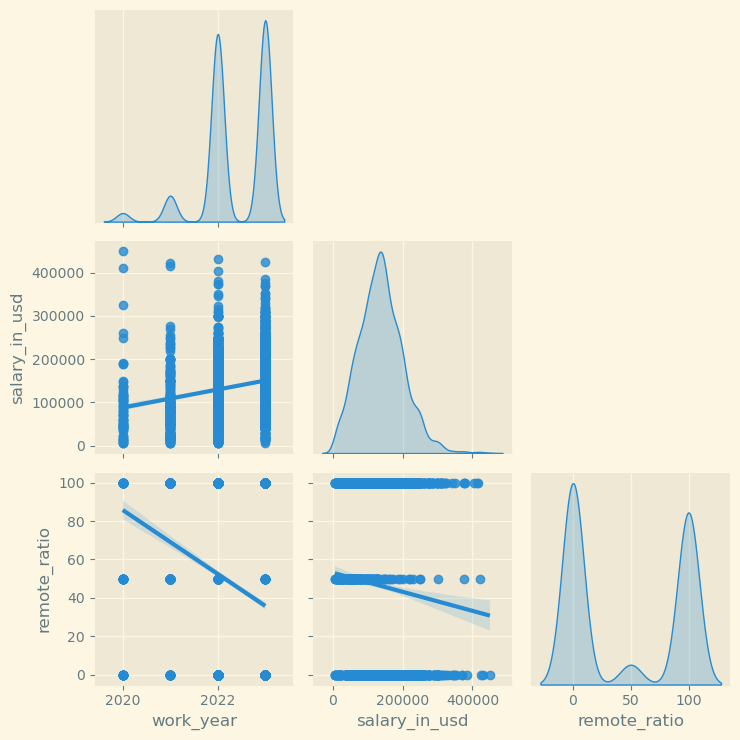

In [ ]:
sns.pairplot(data = df, corner=True, diag_kind='kde', kind = 'reg')
plt.tight_layout();

### How it's work our label variable 'salary_in_usd'

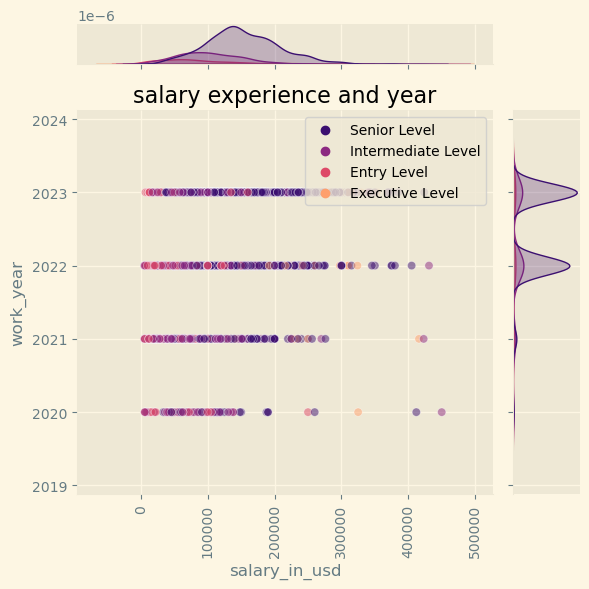

In [ ]:
plt.style.use('Solarize_Light2')
sns.jointplot(data = df, x = 'salary_in_usd', y = 'work_year',hue = 'experience_level', palette= 'magma', alpha = 0.5)
plt.xticks(rotation=90)
plt.title('salary experience and year')
plt.legend(loc = 'upper right')
plt.tight_layout();
